## Plotting the Charts (health.html)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.simplefilter('ignore')

In [80]:
file = os.path.join('demographics','regions.csv')
regions_df = pd.read_csv(file)

file = os.path.join('demographics','population.csv')
population_df = pd.read_csv(file)

file = os.path.join('health','diseases.csv')
diseases_df = pd.read_csv(file)

### X-Values: Population, Health

In [82]:
x_values = pd.merge(diseases_df, population_df, on=['Country_Code'], how='inner')
x_values.head()

,Country_Code,Non-communicable diseases (NCDs) (DALYs lost),Respiratory diseases (DALYs lost),Pop Density (per sqkm),Ages 0-9,Ages 10-19,Ages 20-29,Ages 30-39,Ages 40-49,Ages 50-59,Ages 60-69,Ages 70-79,Ages 80+,Population Total
0,AFG,6.948558e+06,359121.716381,56.937760,0.295644,0.254022,0.175506,0.114011,0.073628,0.046054,0.026612,0.011763,0.002760,37172388
1,ALB,6.276270e+05,25151.250839,104.612263,0.115932,0.135609,0.169658,0.126100,0.117269,0.137702,0.105786,0.064589,0.027355,2866376
2,DZA,7.036442e+06,330359.109288,17.730075,0.220813,0.147823,0.164383,0.167842,0.119867,0.084425,0.055158,0.026990,0.012701,42228429
3,AGO,4.181835e+06,227763.402362,24.713052,0.337316,0.236616,0.161649,0.111513,0.072069,0.044858,0.023043,0.010207,0.002731,30809764
4,ATG,1.778531e+04,594.414103,218.831818,0.149727,0.146995,0.153455,0.146061,0.144710,0.127324,0.076099,0.038585,0.017044,96282


In [83]:
# Seniors Ages 70+
x_values['Ages 70+'] = x_values['Ages 70-79'] + x_values['Ages 80+']

### Y-Values: Confirmed, Fatalities (All Countries)

In [76]:
file = os.path.join('cases','all.ipynb')
%run '{file}'

In [87]:
def scatter_all(y_df, y_label, y_col, output_file):
    y_values = y_df.iloc[:,[21]]    # number of days from first case
    y_values.dropna(inplace=True)
    y_values.reset_index(inplace=True)
    y_values = pd.merge(regions_df, y_values, on=['Country_Region'], how='inner')

    merged_df = pd.merge(y_values, x_values, how='inner')

    selected_df = merged_df.loc[:, [21, y_col]]
    selected_df.dropna(inplace=True)

    x_scatter = selected_df.iloc[:,1]
    y_scatter = selected_df.iloc[:,0]

    fig, ax = plt.subplots(figsize = (9,6))
    
    if (y_label=='Confirmed Cases'):
        mcolor = 'coral'
    else:
        mcolor = None
  
    if ('Ages' in y_col):
        y_col = y_col + " (% of Population)"
    
    plt.scatter(x_scatter, y_scatter, s=150, color=mcolor, alpha=0.8)
    
#     plt.title(y_col, fontsize=18)
    plt.xlabel(y_col, labelpad=20, fontsize=16)
    plt.ylabel(y_label, labelpad=5, fontsize=14)
    plt.xlim(x_scatter.max()*-0.03, x_scatter.max()*1.03)  
    plt.ylim(y_scatter.max()*-0.03, y_scatter.max()*1.03)
#     ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, p: format(int(y), ',')))

    ax.tick_params(axis='both', labelsize=14)

    file = os.path.join('..', 'images', output_file)
    plt.savefig(file, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

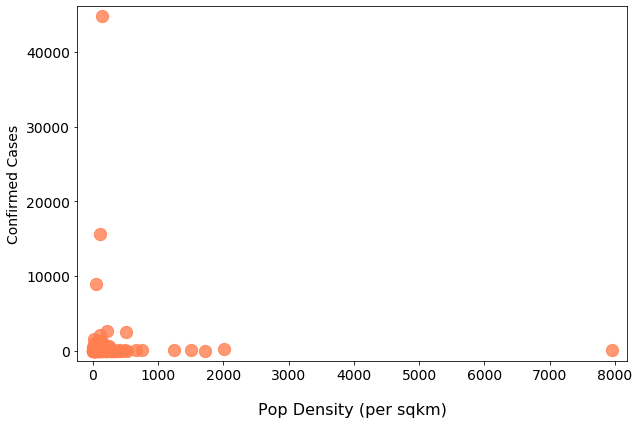

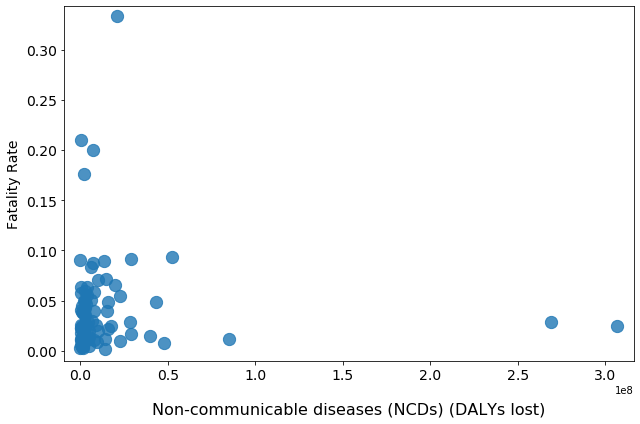

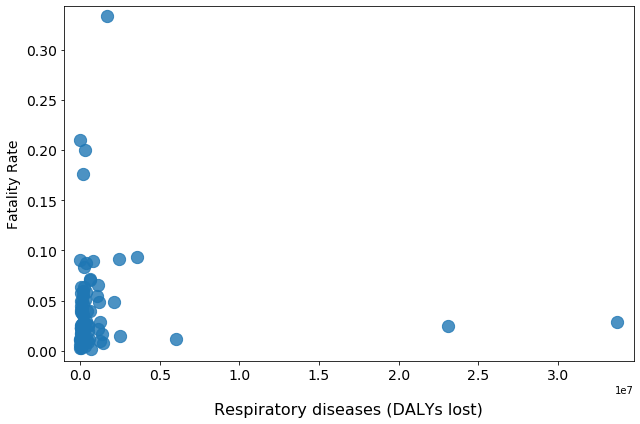

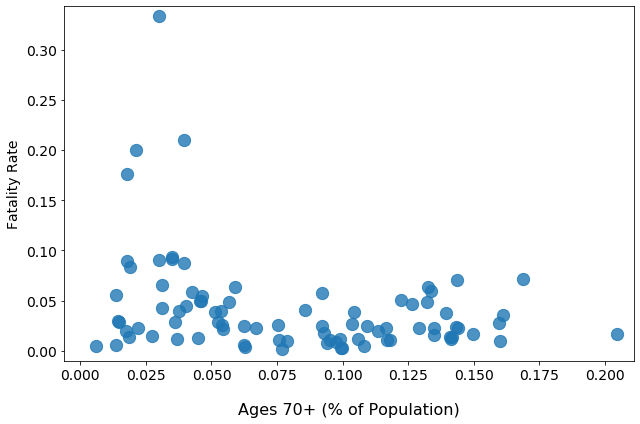

In [95]:
scatter_all(first_confirmed_all, 'Confirmed Cases', 'Pop Density (per sqkm)', 'scatter_popdensity.png')
scatter_all(fatality_rate_df, 'Fatality Rate', 'Non-communicable diseases (NCDs) (DALYs lost)', 'scatter_ncds.png')
scatter_all(fatality_rate_df, 'Fatality Rate', 'Respiratory diseases (DALYs lost)', 'scatter_resps.png')
scatter_all(fatality_rate_df, 'Fatality Rate', 'Ages 70+', 'scatter_age.png')